# Codebook

## helpyourngo.json

__Data provided by:__ www.helpyourngo.com <br/>
__Source:__ s3://daanmatchdatafiles/webscrape-fall2021/helpyourngo.json <br/>
__Type:__ json <br/>
__Last Modified:__ October 31, 2021, 14:58:41 (UTC-07:00) <br/>
__Size:__ 1.6 MB <br/>

helpyourngo.json named helpyourngo_df contains: <br/>
List of NGOs indexed on helpyourngo.com

* COLUMN NAME: Content
    * Issues
    * Transformations

* name: NGO Name
    * Issues: Duplicate Names (e.g. Search NGO)
* last_updated: Most recent year that this data was collected
    
* address: Address
    * Issues: Escape chars

* mobile: Phone Number
    * Issues: Some NGOs have multiple phone numbers in the same column, Numbers may have an extra leading 0, Country code might be duplicated, Formatting varies dramatically
    
* email: Email
    * Issues: Some NGOs have multiple emails in the same column
    
* website: Website
    * Issues: String representation of NA (e.g. 'NA', 'N.A.', 'N. A.', 'N.A', 'Under Construction')
    * Transformations: Convert string representations of NA to None
    
* annual_expenditure: Annual Expenditure for the last_updated Year
    * Issues: Contains negative values
    * Transformations: Remove commas and convert from str to int
    
* description: Description of the NGO
    * Issues: Has abnormal spacings and irregular characters (‘ vs ')

## Imports

In [1]:
import boto3
import io
import string
import requests

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


sns.set(rc={'figure.figsize':(16,5)})

## Load Data

In [2]:
# df = pd.read_json('helpyourngo.json', orient='values')

client = boto3.client('s3')
resource = boto3.resource('s3')

In [3]:
obj = client.get_object(Bucket='daanmatchdatafiles', Key='webscrape-fall2021/helpyourngo.json')
df = pd.read_json(io.BytesIO(obj['Body'].read()))

<br/>

## Summary of HelpYourNGO

In [4]:
df.head()

,name,last_updated,address,mobile,email,website,annual_expenditure,description
0,Aai Caretaker,2020.0,"Room No. B/4, Ashok Nagar, Near Krishna Medica...",+91 22 25530537,info@aaicaretaker.org.in,www.aaicaretaker.in,"138,990,084",Aai Caretaker is involved in diverse activitie...
1,Aakriti,2015.0,"J-159, Sector-10 DLF, Faridabad 121006. Haryana",+91 9312263021,aakritischool@yahoo.in,www.aakritingo.org,"1,023,204","A parent-initiative, Association for Ability K..."
2,Aakash Maindwal Foundation,2016.0,"107, First Floor, Block - Milano, Mahagun Mosa...",+91 120 4377527,aakashmaindwalfoundation@gmail.com,www.amfindia.org,"767,980",Aakash Maindwal Foundation has been working to...
3,Aaradhana Sanstha,2013.0,"14, Sulabhpuram, Sikandara Bodla Road, Agra 28...",+91 9639161612,drhchaudhary@yahoo.com,None,None,Aaradhana Sanstha was formed for educational u...
4,Action Against Hunger (Fight Hunger Foundation),2019.0,"201, Sai Prasad Building, Sion Kamgar CHS Ltd,...",+91 022 2611 1275,contact@fighthungerfoundation.org,www.actionagainsthunger.in,"86,348,954",Action Against Hunger (AAH) registered as Figh...


In [5]:
print("(rows, cols):", df.shape)

(rows, cols): (688, 8)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                688 non-null    object 
 1   last_updated        679 non-null    float64
 2   address             688 non-null    object 
 3   mobile              683 non-null    object 
 4   email               683 non-null    object 
 5   website             683 non-null    object 
 6   annual_expenditure  660 non-null    object 
 7   description         688 non-null    object 
dtypes: float64(1), object(7)
memory usage: 43.1+ KB


<br/>

## Missing Values

In [7]:
# Total missing values
missing_values_hist = df.isna().sum()
print('Total Missing Values:')
print(missing_values_hist)

Total Missing Values:
name                   0
last_updated           9
address                0
mobile                 5
email                  5
website                5
annual_expenditure    28
description            0
dtype: int64


In [8]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_hist_perc = df.isnull().mean() * 100
print('Percentage of Missing Values:')
print(missing_values_hist_perc)

Percentage of Missing Values:
name                  0.000000
last_updated          1.308140
address               0.000000
mobile                0.726744
email                 0.726744
website               0.726744
annual_expenditure    4.069767
description           0.000000
dtype: float64


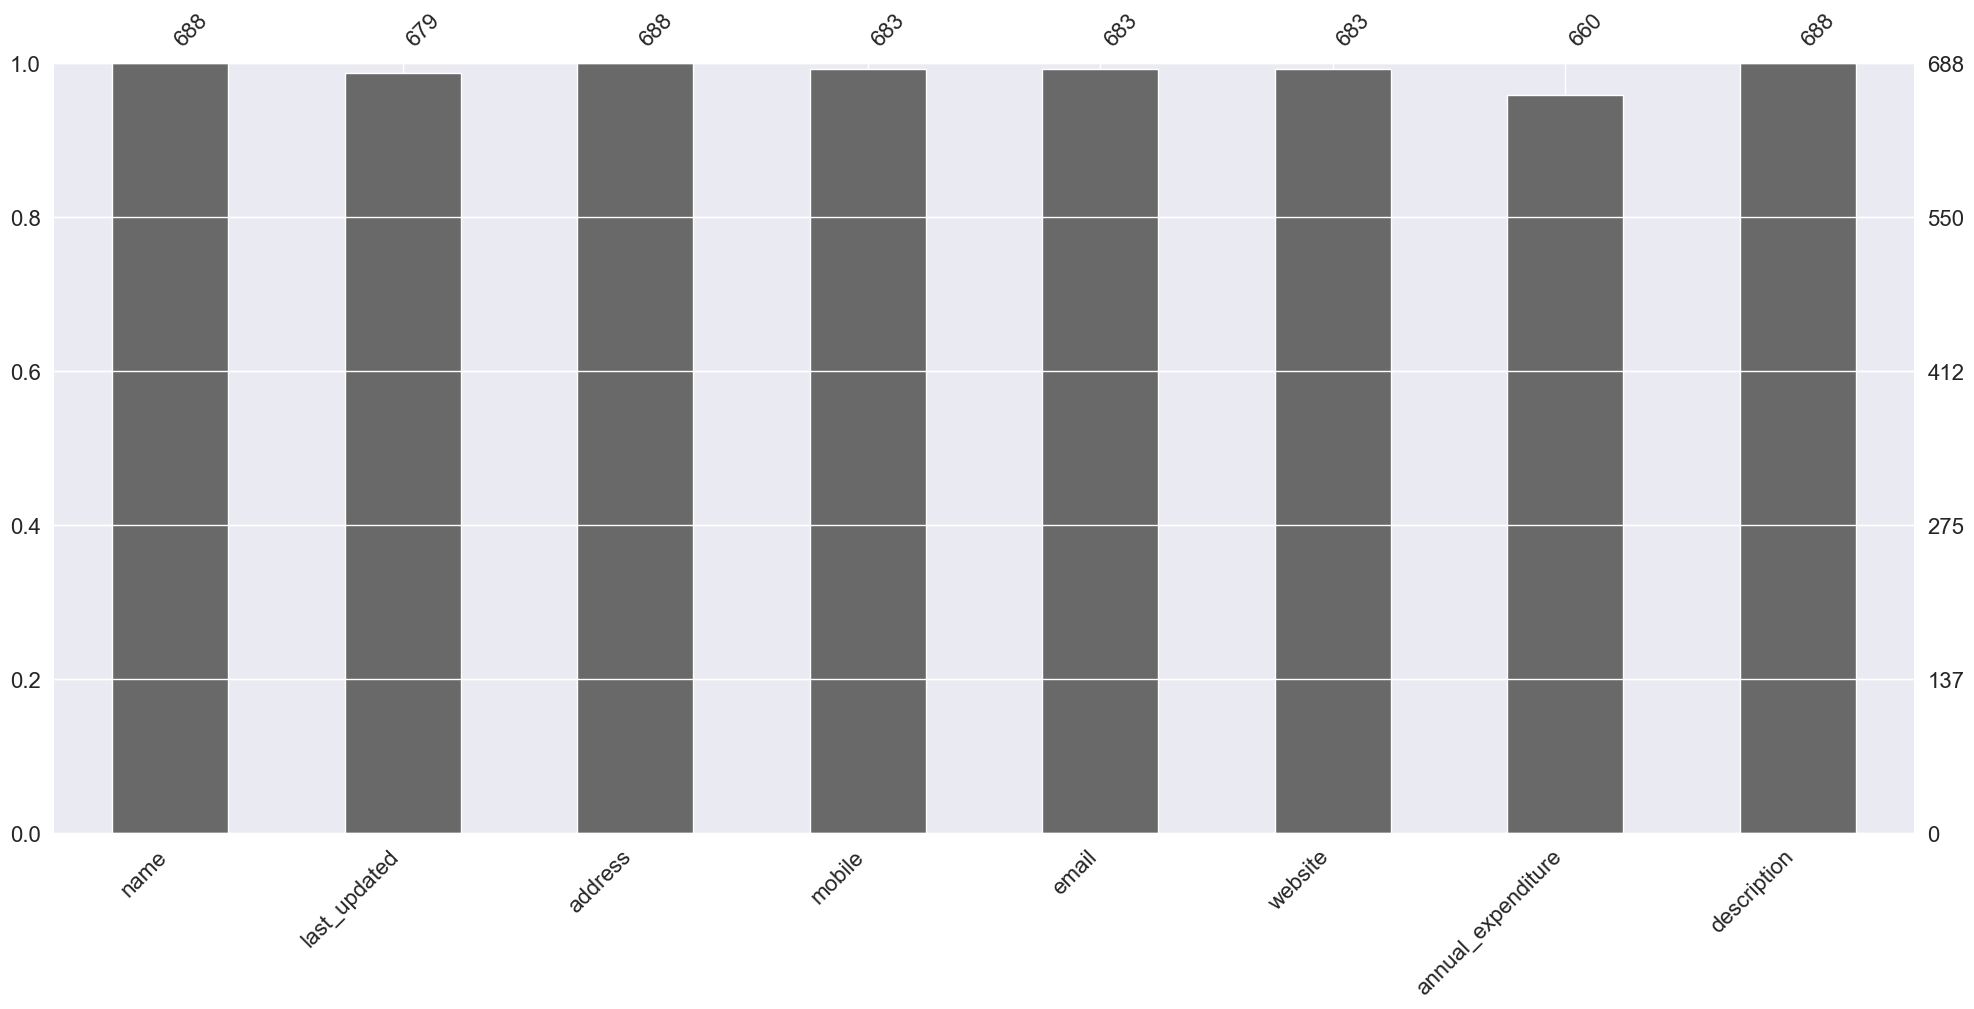

In [9]:
# Visualize the completeness of the dataframe
msno.bar(df)
plt.show()

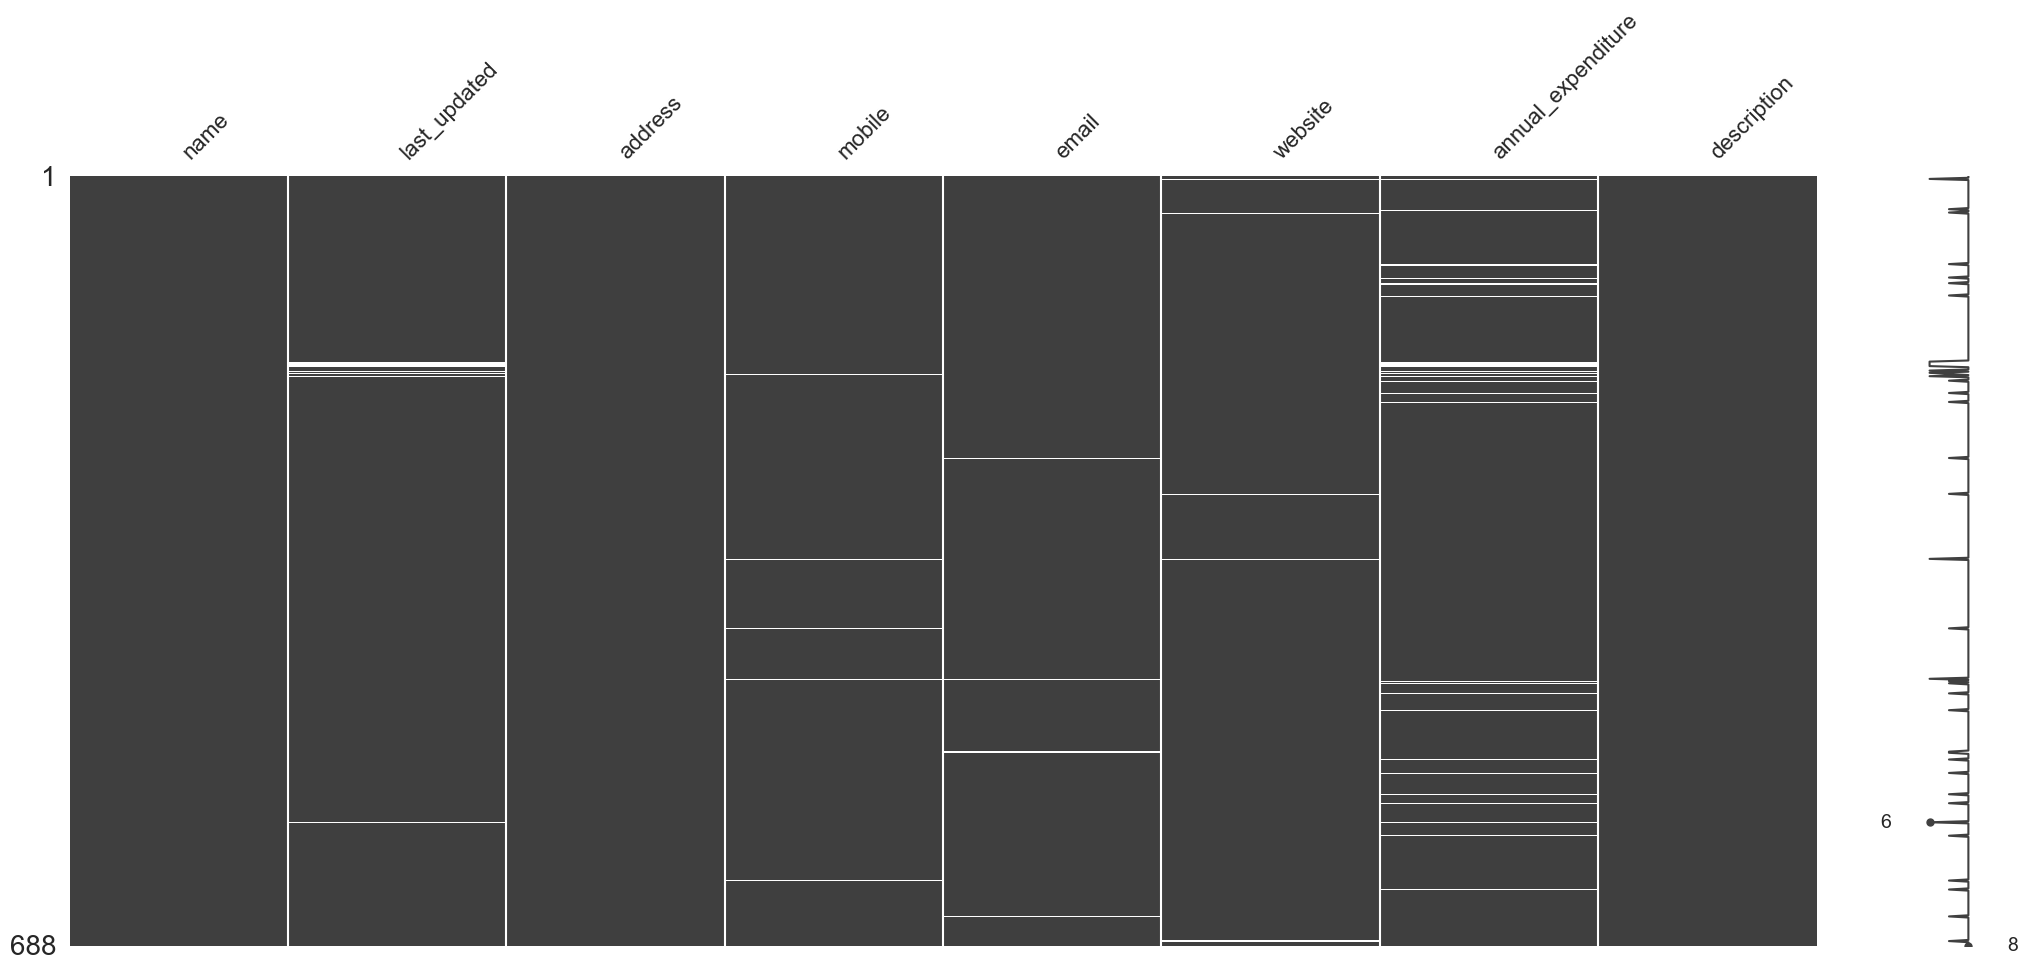

In [10]:
# Visualize the locations of the missing values of the dataset
msno.matrix(df)
plt.show()

<br/>

## Columns

### name

In [11]:
names = df["name"]
pd.DataFrame(names)

,name
0,Aai Caretaker
1,Aakriti
2,Aakash Maindwal Foundation
3,Aaradhana Sanstha
4,Action Against Hunger (Fight Hunger Foundation)
...,...
683,Abhinav Bahuuddeshiya Kalamanch
684,Abhaya Foundation
685,Abhinav
686,Action For Development Of Demos (ADD)


In [12]:
# Number of empty strings/missing values
print("Invalid:", sum(names == " ") + sum(names.isna()))
print("No. of unique values:", len(names.unique()))

# Check for duplicates
print("No. of duplicates:", (names.value_counts()-1).sum())

pd.DataFrame(names.value_counts()).reset_index().rename(columns={0:"Count"})

Invalid: 0
No. of unique values: 683
No. of duplicates: 5


,index,name
0,Search NGO,6
1,Aai Caretaker,1
2,Gramin Punarnirman Sansthan,1
3,Guide for Rural Agriculture Development and Ed...,1
4,Gramin Vikas Evam Paryavaran Sanstha (GVEPS),1
...,...,...
678,Reaching Hand Trust,1
679,Ratna Nidhi Charitable Trust,1
680,Ramashiv Bahuudeshiya Vikas Samiti,1
681,RASTA,1


In [13]:
# Example
df[df.name == "Search NGO"]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
166,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
167,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
168,Search NGO,NaN,Kannamwar Nagar Municipal Marathi S...,+91 (022)2577 9600 / (022)2577 9671,info@nade-india.org,www.nade-India.org,None,Special School for the Mentally Challenged Ch...
169,Search NGO,NaN,"C/o Little Angels Primary School, PWD Camp, Si...",+91 9986978199,jssngo05@gmail.com,https://lightofhope.me,None,
170,Search NGO,NaN,"70, Juhu Supreme Shopping Centre, Gulmohar Cro...",+91 6677667766,chauhan.satish96@gmail.com,www.nspa.in,None,asasa asasas asasasa
174,Search NGO,NaN,116 Hunter St 27502-1314. Maharashtra,+91 08898907102,sat@satw.com,www.nspa.in,None,Animal is our objective Same as Objective Our...


#### Observations

* The entries with "Search NGO" as the name seem to be copies of other NGOs with their names in the data.

<br/>

### last_updated

In [14]:
last_updated = df["last_updated"]
pd.DataFrame(last_updated)

,last_updated
0,2020.0
1,2015.0
2,2016.0
3,2013.0
4,2019.0
...,...
683,2020.0
684,2015.0
685,2015.0
686,2014.0


In [15]:
# Number of empty strings/missing values
print("Invalid:", sum(last_updated == " ") + sum(last_updated.isna()))
print("No. of unique values:", len(last_updated.unique()))

# Check for duplicates
print("No. of duplicates:", (last_updated.value_counts()-1).sum())

temp = pd.DataFrame(last_updated.value_counts()).reset_index().rename(columns={"index":"last_updated", "last_updated":"Count"})
temp

Invalid: 9
No. of unique values: 10
No. of duplicates: 670


,last_updated,Count
0,2015.0,196
1,2018.0,93
2,2014.0,80
3,2020.0,79
4,2016.0,70
5,2013.0,65
6,2019.0,51
7,2012.0,25
8,2017.0,20


In [16]:
# Summary Statistics
last_updated.describe()

count     679.000000
mean     2016.035346
std         2.309130
min      2012.000000
25%      2014.500000
50%      2015.000000
75%      2018.000000
max      2020.000000
Name: last_updated, dtype: float64

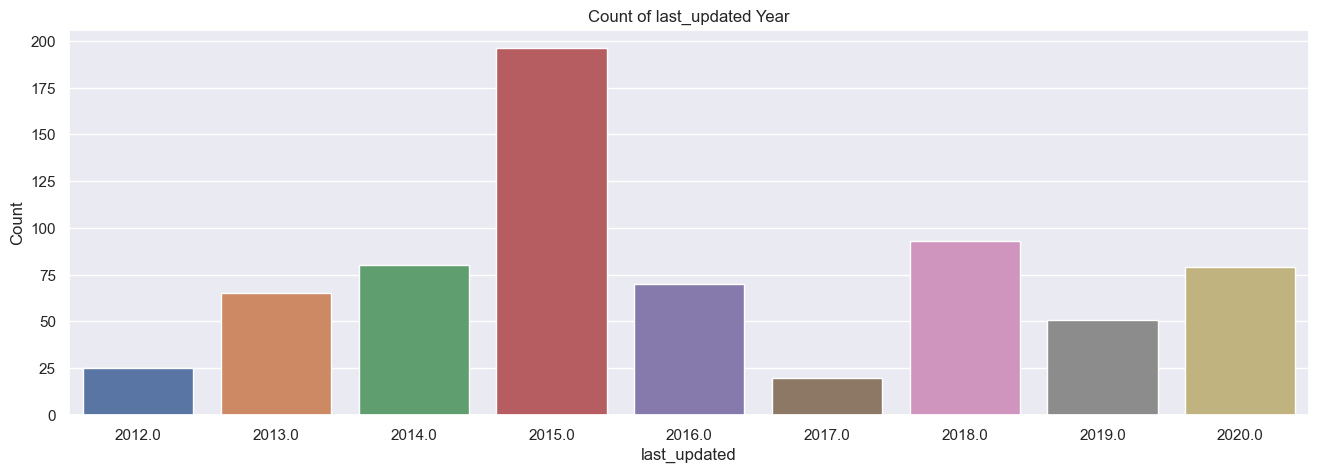

In [17]:
# Distribution
plt.title("Count of last_updated Year")
sns.barplot(x = "last_updated", y = "Count", data = temp);
plt.show()

<br/>

### address

In [18]:
addresses = df["address"]
pd.DataFrame(addresses)

,address
0,"Room No. B/4, Ashok Nagar, Near Krishna Medica..."
1,"J-159, Sector-10 DLF, Faridabad 121006. Haryana"
2,"107, First Floor, Block - Milano, Mahagun Mosa..."
3,"14, Sulabhpuram, Sikandara Bodla Road, Agra 28..."
4,"201, Sai Prasad Building, Sion Kamgar CHS Ltd,..."
...,...
683,"Near Govt Science College, Gokulngar,\r\nWard ..."
684,"6-3-609/140/1, Anand Nagar, Khairatabad, Hyder..."
685,"Vishnu Vihar (Opp.Surandra Nagar), Jansath Roa..."
686,"East Indira Nagar, Road No. 5, Kankarbagh, Pat..."


In [19]:
# Number of empty strings/missing values
print("Invalid:", sum(addresses == " ") + sum(addresses.isna()))
print("No. of unique values:", len(addresses.unique()))

# Check for duplicates
print("No. of duplicates:", (addresses.value_counts()-1).sum())

temp = pd.DataFrame(addresses.value_counts()).reset_index().rename(columns={"index":"address", "address":"Count"})
temp

Invalid: 0
No. of unique values: 686
No. of duplicates: 2


,address,Count
0,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",3
1,"Room No. B/4, Ashok Nagar, Near Krishna Medica...",1
2,"House No: 33, Road No: 3, Patliputra Colony, P...",1
3,"M-21, Vaishali Nagar, Damoh 470661. Madhya Pr...",1
4,"No. 2/57, Nehru Street, Bangarupalyam, Chitto...",1
...,...,...
681,"No. 377, 8th Cross, 1st Block, Jayanagar, Beng...",1
682,"31-59/1, Gundaiah Gari Thota, Guntur Dist., Ch...",1
683,"36/8, Type-III, H.V.F. Estate, Avadi, Chennai ...",1
684,"No 44, 1st Floor, Nehru Road, Above Syndicate ...",1


In [20]:
# Example
df[df.address == temp.iloc[0,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
166,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
167,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
264,Prakriti Environment Society (PES),2020.0,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,"-138,266",Prakriti Environment Society (PES) was establi...


#### Observations

* Looking at the above dataframe, we see that Prakriti Environment Society (PES) shares a lot of information with the Search NGO entries. We might be able to conclude that the Search NGO entries are completely unnecessary and can be deleted.
* Might contain escape chars

<br/>

### mobile

In [21]:
mobile = df["mobile"]
pd.DataFrame(mobile)

,mobile
0,+91 22 25530537
1,+91 9312263021
2,+91 120 4377527
3,+91 9639161612
4,+91 022 2611 1275
...,...
683,+91 9420145292
684,+91 9866593535
685,+91 8057901700
686,+91 612 2367665; +91 9939606148


In [22]:
pd.DataFrame(mobile).T

,0,1,2,3,4,5,6,7,8,9,...,678,679,680,681,682,683,684,685,686,687
mobile,+91 22 25530537,+91 9312263021,+91 120 4377527,+91 9639161612,+91 022 2611 1275,+91 240 2050330,+91 11 41007526,+91 9911447258,+91 22 65260281; +91 22 65260282,+91 11 26510915,...,+91 484 3260691,+91 44 27293555,+91 +91 9440155869,+91 9810904918; +91 9313617433,+91 11-40540991,+91 9420145292,+91 9866593535,+91 8057901700,+91 612 2367665; +91 9939606148,+91 9247401815


In [23]:
# Number of empty strings/missing values
print("Invalid:", sum(mobile == " ") + sum(mobile.isna()))
print("No. of unique values:", len(mobile.unique()))

# Check for duplicates
print("No. of duplicates:", (mobile.value_counts()-1).sum())

temp = pd.DataFrame(mobile.value_counts()).reset_index().rename(columns={"index":"mobile", "mobile":"Count"})
temp

Invalid: 5
No. of unique values: 679
No. of duplicates: 5


,mobile,Count
0,+91 +91 40 23702776,3
1,+91 08898907102,2
2,+91 (022)2577 9600 / (022)2577 9671,2
3,+91 9986978199,2
4,+91 1424 282234,1
...,...,...
673,+91 9094917145,1
674,+91 80 41677874,1
675,+91 22 23898930,1
676,+91 07662-250141,1


In [24]:
# Example
df[df.mobile == temp.iloc[2,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
83,The National Association of Disabled's Enterpr...,2020.0,"Ground Floor, Muncipal Marathi School, Kannamw...",+91 (022)2577 9600 / (022)2577 9671,info@nade-india.org,www.nade-India.org,"86,630",The National Association of Disabled’s Enterp...
168,Search NGO,NaN,Kannamwar Nagar Municipal Marathi S...,+91 (022)2577 9600 / (022)2577 9671,info@nade-india.org,www.nade-India.org,None,Special School for the Mentally Challenged Ch...


#### Observations

* The above is further evidence that we can safely delete the Search NGO entries since it is clear that the first NGO is the same as the second NGO. 
* Some NGOs have multiple phone numbers. We could handle this by extracting only one number. Alternatively we could keep all the numbers.
* Some phone numbers have 11 digits if they have a leading 0. The 0 prefix is to be used to call mobile numbers from landlines.
* Phone number formats vary dramatically. Examples:
    * +91 91 141  2750310
    * +91 044 - 28157212/044 - 28157373
    * +91 91-22-2774 0990
    * +91 N.A.
    * +91 (022)2577 9600  /  (022)2577 9671

### email

In [25]:
emails = df["email"]
pd.DataFrame(emails)

,email
0,info@aaicaretaker.org.in
1,aakritischool@yahoo.in
2,aakashmaindwalfoundation@gmail.com
3,drhchaudhary@yahoo.com
4,contact@fighthungerfoundation.org
...,...
683,akilsheikh15@gmail.com
684,abhaya@abhayafoundation.org
685,info@abhinavindia.org
686,demos@sify.com


In [26]:
# Number of empty strings/missing values
print("Invalid:", sum(emails == " ") + sum(emails.isna()))
print("No. of unique values:", len(emails.unique()))

# Check for duplicates
print("No. of duplicates:", (emails.value_counts()-1).sum())

temp = pd.DataFrame(emails.value_counts()).reset_index().rename(columns={"index":"email", "email":"Count"})
temp

Invalid: 5
No. of unique values: 679
No. of duplicates: 5


,email,Count
0,prakritipes@yahoo.com,3
1,info@nade-india.org,2
2,chauhan.satish96@gmail.com,2
3,jssngo05@gmail.com,2
4,info@aaicaretaker.org.in,1
...,...,...
673,rrheds@gmail.com,1
674,retrust99@gmail.com,1
675,info@reachinghand.org,1
676,info@ratnanidhi.org,1


In [27]:
# Example of duplicate
df[df.email == temp.iloc[1,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
83,The National Association of Disabled's Enterpr...,2020.0,"Ground Floor, Muncipal Marathi School, Kannamw...",+91 (022)2577 9600 / (022)2577 9671,info@nade-india.org,www.nade-India.org,"86,630",The National Association of Disabled’s Enterp...
168,Search NGO,NaN,Kannamwar Nagar Municipal Marathi S...,+91 (022)2577 9600 / (022)2577 9671,info@nade-india.org,www.nade-India.org,None,Special School for the Mentally Challenged Ch...


In [28]:
# Example of multiple emails in same column
df[df.email.str.contains(',').fillna(False)]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
14,Abhiprerna Foundation,2020.0,"126-A, New Haridwar Colony, Ranipur More, Hari...",+91 9319041049,"info@abhiprernafoundation.org, abhiprerna@gmai...",www.abhiprernafoundation.org,"6,692,951",Abhiprerna Foundation was established in 2007 ...
72,Udaan Society,2018.0,"8/140, Raguvir Puri, G. T. Road, Aligarh 20200...",+91 571 6450159,"mail@udaansociety.org, udaansociety@gmail.com",www.udaansociety.org,"2,650,456",Udaan Society primarily works to establish an ...
100,Stree Mukti Sanghatana,2013.0,"31, Shramik, Royal Crest, 1st Floor, Lokamanya...",+91 22 24174381,"smsmum@gmail.com, sms@streemuktisanghatana.org",www.streemuktisanghatana.org,"13,638,928",Stree Mukti Sanghatana (SMS) was established t...
129,"Society for Animal, Health, Agriculture, Scien...",2020.0,"Munshiganj, Post-H.A.L. Korwa, Dist. Amethi, S...",+91 9473795690,"info@sahashindia.org, sahashindia@gmail.com",www.sahashindia.org,"340,945","Society for Animal, Health, Agriculture, Scien..."
164,Shiv Shiva (Sneh) Sanstha,2015.0,"Phullanpur, Post-Bikapur, Ghazipur 233001. Utt...",+91 548 2230849,"sneh@snehsanstha.in, info@snehsanstha.in",www.snehsanstha.in,"1,328,629",Shiv Shiva (Sneh) Sanstha is an NGO working fo...
345,Marathwada Gramin Vikas Sanstha (MGVS),2019.0,"Gut. No. 122, At. Post Karajgaon, Tal. Vaijapu...",+91 240 2341411,"mgvs.vaijapur@gmail.com, info@mgvsabad.org",www.mgvsabad.org,"29,023,243",Marathwada Gramin Vikas Sanstha (MGVS) is an o...
423,Indian Grameen Services,2015.0,"Indian Grameen Services, BC-247, Sector-1, Sal...",+91 33-23596264,"nidhi.bansal@basixindia.com, info@igsindia.org...",www.igsindia.org.in,"390,513,727",Indian Grameen Services (IGS) is engaged in de...


#### Observations

* Some rows have multiple emails in the same email string.

<br/>

### Website

In [29]:
website = df["website"]
pd.DataFrame(website)

,website
0,www.aaicaretaker.in
1,www.aakritingo.org
2,www.amfindia.org
3,None
4,www.actionagainsthunger.in
...,...
683,None
684,www.abhayafoundation.org
685,www.abhinavindia.org
686,N.A


In [30]:
# Number of empty strings/missing values
print("Invalid:", sum(website == " ") + sum(website.isna()))
print("No. of unique values:", len(website.unique()))

# Check for duplicates
print("No. of duplicates:", (website.value_counts()-1).sum())

temp = pd.DataFrame(website.value_counts()).reset_index().rename(columns={"index":"website", "website":"Count"})
temp

Invalid: 5
No. of unique values: 611
No. of duplicates: 73


,website,Count
0,N.A.,26
1,N. A.,22
2,NA,16
3,N.A,6
4,www.nspa.in,4
...,...,...
605,www.rsksajmer.org,1
606,www.rahaindia.org,1
607,www.radhamedicaltrust.com,1
608,www.questalliance.net,1


__Note:__ We can see that there are clearly some strings containing some character representation of NA. Lets look at the statistics when we include those NA strings as actual missing values.

In [31]:
# Handle fake string NA values

# Temporarily fill null values with 'NA'
website_c = website.copy()

# If string resembles "NA", then convert it's value to None
str_rep_NA = ["N.A.", "N. A.", "NA", "N.A", "Under Construction"]
count_NA = sum(website_c.isna())
for s in str_rep_NA:
    count_NA += sum(website_c == s)
    website_c[website_c == s] = None

print("Invalid:", count_NA)
print("No. of unique values:", len(website_c.unique()))

# Check for duplicates
print("No. of duplicates:", (website_c.value_counts()-1).sum())

temp = pd.DataFrame(website_c.value_counts()).reset_index().rename(columns={"index":"website", "website":"Count"})
temp

Invalid: 77
No. of unique values: 606
No. of duplicates: 6


,website,Count
0,www.nspa.in,4
1,www.myprakriti.org,3
2,www.nade-India.org,2
3,www.gmpst.org,1
4,www.gravis.org.in,1
...,...,...
600,www.rsksajmer.org,1
601,www.rahaindia.org,1
602,www.radhamedicaltrust.com,1
603,www.questalliance.net,1


In [32]:
# Example of duplicate
df[df.website == temp.iloc[0,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
170,Search NGO,NaN,"70, Juhu Supreme Shopping Centre, Gulmohar Cro...",+91 6677667766,chauhan.satish96@gmail.com,www.nspa.in,None,asasa asasas asasasa
174,Search NGO,NaN,116 Hunter St 27502-1314. Maharashtra,+91 08898907102,sat@satw.com,www.nspa.in,None,Animal is our objective Same as Objective Our...
176,Satish4,NaN,"Plot No. 1 Rajiv Gandhi Technology Park, Mumba...",+91 08898907102,abhinav@themarksys.com,www.nspa.in,None,Some Obj Some Sub Obj SOme note
179,Satish Test1,NaN,"70, Juhu Supreme Shopping Centre, Gulmohar Cro...",+91 02323232323,chauhan.satish96@gmail.com,www.nspa.in,None,Animal Support Animal Care Some Procile Here


In [33]:
# Example of websites "Under Construction"
df[df.website == "Under Construction"]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
430,India Sponsorship Committee (ISC),2017.0,"Mathuradas Estate Building, No. 1, 2nd Floor, ...",+91 22040321; +91 22 22021287; +91 22 22020393,indiasponsorshipcommittee@gmail.com,Under Construction,"24,322,675","India Sponsorship Committee (ISC), established..."
527,Deep Jyoti Charitable Trust,2014.0,"Ward No. 12, Sukhpur, Supaul 852130. Bihar",+91 9534373717,deepjyoti.ct@gmail.com,Under Construction,"854,355",Deep Jyoti Charitable Trust (DJCT) primary foc...


#### Observations

* The NA strings need to be converted to actual null values, preferably using a general function that is likely to capture potential future string representations of NA.
* Some websites are "Under Construction"

### annual_expenditure

In [34]:
annual_expenditure = df["annual_expenditure"]
pd.DataFrame(annual_expenditure)

,annual_expenditure
0,"138,990,084"
1,"1,023,204"
2,"767,980"
3,None
4,"86,348,954"
...,...
683,"903,612"
684,"7,907,718"
685,"9,493,108"
686,"2,473,686"


In [35]:
# Number of empty strings/missing values
print("Invalid:", sum(annual_expenditure == " ") + sum(annual_expenditure.isna()))
print("No. of unique values:", len(annual_expenditure.unique()))

# Check for duplicates
print("No. of duplicates:", (annual_expenditure.value_counts()-1).sum())

temp = pd.DataFrame(annual_expenditure.value_counts()).reset_index().rename(columns={"index":"annual_expenditure", "annual_expenditure":"Count"})
temp

Invalid: 28
No. of unique values: 661
No. of duplicates: 0


,annual_expenditure,Count
0,"138,990,084",1
1,"11,538,283",1
2,"1,975,422",1
3,"243,863",1
4,"1,435,924",1
...,...,...
655,"2,235,775",1
656,"14,345,400",1
657,"10,994,755",1
658,"223,710",1


In [36]:
# Convert to integer
temp2 = temp.copy()
remove_commas = temp2['annual_expenditure'].str.replace(',', '')
temp2['annual_expenditure'] = pd.to_numeric(remove_commas)

# Check for expenditure < 0
print("No. of NGOs with negative annual_expenditure:", (temp2['annual_expenditure'] < 0).sum())


temp2[temp2['annual_expenditure'] < 0]

No. of NGOs with negative annual_expenditure: 20


,annual_expenditure,Count
35,-3384603,1
76,-156691,1
114,-97327,1
144,-33445,1
172,-471720,1
177,-1763605,1
201,-2134446,1
252,-4013,1
295,-83963,1
309,-555035,1


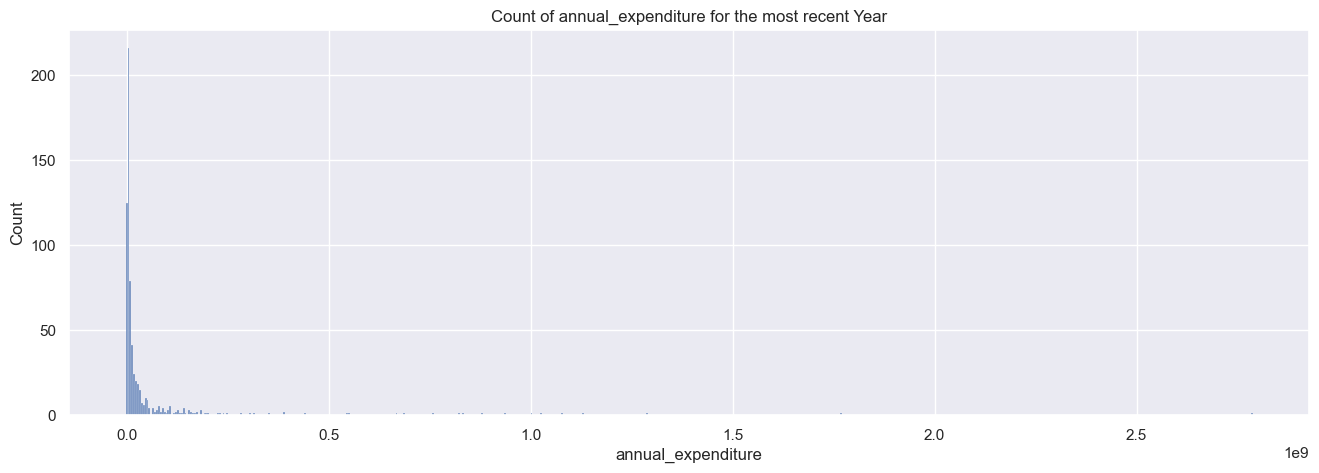

In [37]:
# Distribution
plt.title("Count of annual_expenditure for the most recent Year")
sns.histplot(x = "annual_expenditure", data = temp2);
plt.show()

C:\Users\mitch\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


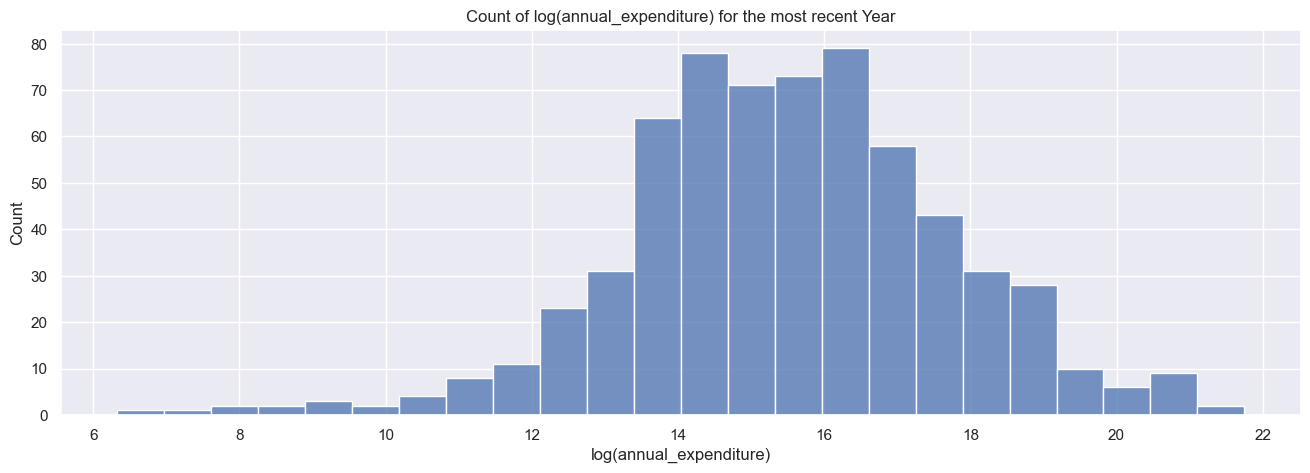

In [38]:
temp2["log(annual_expenditure)"] = np.log(temp2["annual_expenditure"])
plt.title("Count of log(annual_expenditure) for the most recent Year")
sns.histplot(x = "log(annual_expenditure)", data = temp2);
plt.show()

In [39]:
# Example of negative expenditure
df[df.annual_expenditure == temp.iloc[9,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
463,Gramin Evam Nagar Vikas Parishad,2018.0,"House No: 33, Road No: 3, Patliputra Colony, P...",+91 612 2270089,genvp.genvp@gmail.com,www.genvp.org,"11,344,845",Gramin Evam Nagar Vikas Parishad (GENVP) helps...


#### Observations

* Need to convert strings w/ commas to int.
* Some NGOs have negative annual expenditure
* Need to confirm the currency

### description

In [40]:
descriptions = df["description"]
pd.DataFrame(descriptions)

,description
0,Aai Caretaker is involved in diverse activitie...
1,"A parent-initiative, Association for Ability K..."
2,Aakash Maindwal Foundation has been working to...
3,Aaradhana Sanstha was formed for educational u...
4,Action Against Hunger (AAH) registered as Figh...
...,...
683,Abhinav Bahuuddeshiya Kalamanch works in the f...
684,Abhaya Foundation has been working for the bet...
685,Abhinav provides help to the urban and rural p...
686,Action For Development Of Demos (ADD) is an or...


In [41]:
# Number of empty strings/missing values
print("Invalid:", sum(descriptions == "") + sum(descriptions.isna()))
print("No. of unique values:", len(descriptions.unique()))

# Check for duplicates
print("No. of duplicates:", (descriptions.value_counts()-1).sum())

temp = pd.DataFrame(descriptions.value_counts()).reset_index().rename(columns={"index":"description", "description":"Count"})
temp

Invalid: 1
No. of unique values: 686
No. of duplicates: 2


,description,Count
0,Prakriti Environment Society (PES) was establi...,3
1,Aai Caretaker is involved in diverse activitie...,1
2,Gramin Evam Nagar Vikas Parishad (GENVP) helps...,1
3,Gramin Vikas Samiti (GVS) was established in 1...,1
4,Guide for Rural Agriculture Development and Ed...,1
...,...,...
681,Rejuvenate India Movement (RIM) catalyses mass...,1
682,Redemption Research for Health and Educational...,1
683,Resource Exchange Trust (RET) was established ...,1
684,Reaching Hand Trust works with vulnerable chil...,1


In [42]:
# Example of duplicate
df[df.description == temp.iloc[0,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
166,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
167,Search NGO,NaN,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,None,Prakriti Environment Society (PES) was establi...
264,Prakriti Environment Society (PES),2020.0,"F 301 4th Floor, Swastik Plaza, SR Nagar, Hyde...",+91 +91 40 23702776,prakritipes@yahoo.com,www.myprakriti.org,"-138,266",Prakriti Environment Society (PES) was establi...


In [43]:
# Example of no description
df[df.description == temp.iloc[1,0]]

,name,last_updated,address,mobile,email,website,annual_expenditure,description
0,Aai Caretaker,2020.0,"Room No. B/4, Ashok Nagar, Near Krishna Medica...",+91 22 25530537,info@aaicaretaker.org.in,www.aaicaretaker.in,"138,990,084",Aai Caretaker is involved in diverse activitie...


In [44]:
# Example of some descriptions
for i in [5,166,349,512,672]:
    print(descriptions[i], "\n")

Aastha Foundation was established in 2008 in Aurangabad, Maharashtra. The main objective of the Foundation is to take care of the elderly, who need help and shelter.  Aastha Foundation wants to construct a Home (Basant Prabha-Visawa) in Aurangabad to provide residential housing and assisted living for the elderly. It will be constructed on 3 acres of land and accommodate up to 100 people. The Home will provide the elderly, twin sharing rooms with sanitation facilities, recreational facilities such as lawns and garden, dining hall and kitchen, meditation room, physiotherapy, counselling, and place to hold cultural events. The construction is expected to start from September 2015, after completing all legal formalities.  In FY15, Aastha Foundation organized an event on ‘Innovations in India’ in which a speech was given by Dr. A. P. J. Abdul Kalam. It organized a workshop on Fund Raising, participated in the GuideStar Exhibition in Mumbai, and also participated at a CSR Live Week Exhibiti

#### Observations

* There is some inconsistent spacing in the descriptions
* Certain characters like ‘ are different from '